# Использование готовых моделей

Мы рассмотрели на лекции, что научное сообщество придумало и протестировало много моделей, которые до сих пор не перестают улучшать результаты. 

Движение open-source и эффективные, удобные фреймворки дали невероятный толчок развитию machine learning и deep learning потому что сократило путь от научной статьи до возможности применить описанные методы до нескольких минут -- ведь стало распростаненной практикой выкладывать архитектуры и веса к ним в открытый доступ. 

Как же получить доступ к таким полезным ресурсам? Новые статьи часто дают ссылку на github где подробно написано как можно использовать и обучать модели. 

А для самых распростаненных архитектур есть реализации прямо внутри библиотек. В этом уроке мы познакомимся с тем, как использовать готовые модели в Keras для классификации. Т.е. как производить **инференс**.



In [ ]:
import tensorflow as tf
tf.enable_eager_execution()
import matplotlib.pyplot as plt
import numpy as np


Для того чтобы получить доступ к реализованным моделям, достаточно обратится к tf.keras.applications. 

Например, попробуем определить знакому нам VGG19

In [ ]:
vgg19 = tf.keras.applications.VGG19()

574717952/574710816 [==============================] - 41s 0us/step


In [ ]:
# посмотрим на саммари
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# но модель инициализирована случайными весами. поэтому делать с помощью нее предсказания -- бесполезно
# с помощью weights='imagenet' -- инициализируем ее параметрами, которые получились при ее обучении на imagenet
# (они скачиваются из интернета)
vgg19 = tf.keras.applications.VGG19(weights='imagenet')

In [ ]:
# скачаем несколько картинок
!wget https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg -O panda.jpg
!wget https://5.imimg.com/data5/CB/DA/MY-24779561/cricket-tennis-balls-500x500.jpg -O ball.jpg
!wget https://image.shutterstock.com/image-photo/luxury-house-beautiful-landscaping-on-260nw-448870624.jpg -O house.jpg

--2019-08-21 14:20:04--  https://github.com/qubvel/efficientnet/raw/master/misc/panda.jpg
Resolving github.com (github.com)... 13.250.177.223
Connecting to github.com (github.com)|13.250.177.223|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg [following]
--2019-08-21 14:20:04--  https://raw.githubusercontent.com/qubvel/efficientnet/master/misc/panda.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116068 (113K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>] 113.35K  --.-KB/s    in 0.002s  

2019-08-21 14:20:04 (47.8 MB/s) - ‘panda.jpg’ saved [116068/116068]

--2019-08-21 14:20:08--  https://5.imimg.com/data5/CB/DA/MY-2

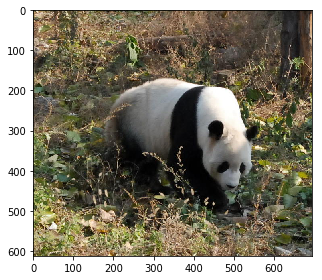

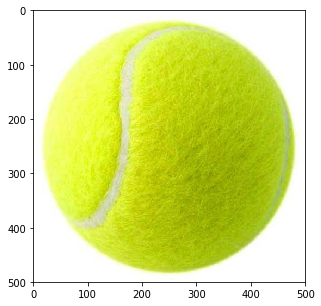

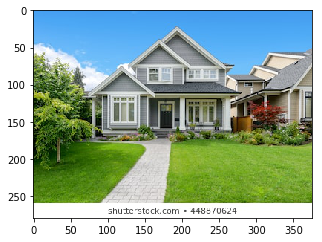

In [ ]:
def read_and_show(path):
    image = plt.imread(path)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    return image

panda = read_and_show("panda.jpg")
ball = read_and_show("ball.jpg")
house = read_and_show("house.jpg")

In [ ]:
# попробуем применить сеть к нашему изображению?
vgg19.predict(panda.astype(np.float32)[None, ...])

ValueError: ignored

In [ ]:
# оказывается, модель ожидает определенный размер, учтем это

def prepare_image(image, image_size):
    image = tf.image.resize(image, image_size)
    return image[None, ...]


prepare_image(panda, (224, 224)).numpy().shape

(1, 224, 224, 3)

In [ ]:
input_image = prepare_image(panda, (224, 224))
prediction = vgg19.predict(input_image)

In [ ]:
# что это?)
prediction

array([[8.49754311e-09, 1.41816814e-09, 1.61326497e-07, 2.72591230e-08,
        7.77947022e-08, 7.97753188e-08, 1.17881223e-06, 3.66090092e-09,
        4.77211373e-08, 1.94533945e-09, 4.72884398e-10, 2.59839994e-09,
        1.18900750e-10, 2.78740639e-08, 3.84456822e-09, 2.90089647e-10,
        3.59355601e-11, 2.10040394e-08, 8.79230768e-08, 2.14489987e-07,
        5.22586363e-10, 1.36896480e-10, 3.88248045e-10, 1.47879149e-08,
        1.45353549e-10, 8.42491077e-11, 3.39380642e-11, 1.63917300e-11,
        3.86213228e-10, 2.21172147e-08, 3.68994800e-11, 2.59421429e-10,
        3.87999112e-11, 2.32099193e-08, 6.44392928e-10, 2.94702318e-10,
        2.30536346e-09, 2.69465533e-10, 6.33047226e-11, 1.24219810e-11,
        1.41558654e-10, 7.37613789e-12, 1.77212791e-12, 1.72280662e-11,
        1.16116674e-11, 1.39721790e-09, 3.44750312e-10, 2.42719369e-11,
        6.09156281e-09, 2.58001759e-10, 3.85600080e-10, 7.81652005e-08,
        6.38243902e-10, 1.50670018e-10, 4.50923993e-10, 3.088390

In [ ]:
prediction.sum(), prediction.shape # предсказали вероятности 1000 классов. а как расшифровать?

(0.99999994, (1, 1000))

In [ ]:
from tensorflow.keras.applications.vgg19 import decode_predictions

input_image = prepare_image(panda, (224, 224))
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

40960/35363 [==================================] - 0s 0us/step


[[('n02510455', 'giant_panda', 0.9387751),
  ('n02395406', 'hog', 0.029422106),
  ('n02108915', 'French_bulldog', 0.010375637),
  ('n02134084', 'ice_bear', 0.009632845),
  ('n02120079', 'Arctic_fox', 0.0038636422)]]

На самом деле в примере выше нам повезло. Мы забыли очень важную часть -- препроцессинг картинки. Для каждой сети он свой и находитя рядом с ней:

In [ ]:
from tensorflow.keras.applications.vgg19 import preprocess_input
# добавим этап препроцессинга и получим еще более правильный ответ
input_image = prepare_image(panda, (224, 224))
input_image = preprocess_input(input_image)
prediction = vgg19.predict(input_image)
decode_predictions(prediction)

[[('n02510455', 'giant_panda', 0.9993144),
  ('n02445715', 'skunk', 0.00038023587),
  ('n02120079', 'Arctic_fox', 0.00013159236),
  ('n02395406', 'hog', 0.00012413586),
  ('n02114548', 'white_wolf', 8.505884e-06)]]

In [ ]:
# сделаем из этого удобную функцию

def make_prediction(model, preprocess_input, decode_predictions, image):
    img_size = (model.input_shape[1], model.input_shape[2])
    input_image = prepare_image(image, img_size)
    input_image = preprocess_input(input_image)
    print(f"Image shape: {input_image.shape}. Max: {input_image.numpy().max()}. Min: {input_image.numpy().min()}.")
    
    prediction = model.predict(input_image)
    return decode_predictions(prediction)

In [ ]:
# и применим на мячике
make_prediction(vgg19, preprocess_input, decode_predictions, ball)

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -103.93900299072266.


[[('n04409515', 'tennis_ball', 0.9998155),
  ('n04039381', 'racket', 0.00011395775),
  ('n03445777', 'golf_ball', 2.6459242e-05),
  ('n03134739', 'croquet_ball', 7.7361365e-06),
  ('n07749582', 'lemon', 7.650217e-06)]]

А теперь попробуем другую сеть -- MobileNetV2

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
mobilenet = MobileNetV2(weights="imagenet")

14540800/14536120 [==============================] - 3s 0us/step


In [ ]:
make_prediction(mobilenet, preprocess_input, decode_predictions, panda)
# почему неправильно ?? 

Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -123.68000030517578.


[[('n09229709', 'bubble', 0.15640192),
  ('n04442312', 'toaster', 0.09473712),
  ('n06874185', 'traffic_light', 0.04562196),
  ('n03891332', 'parking_meter', 0.042949922),
  ('n03584829', 'iron', 0.027716093)]]

**Мы применили препроцессинг одной сети к другой. Это и привело к неправильным предсказаниям.** Это очень важно. Всегда пытайтесь понять что именно на вход принимает та или иная сеть. Каким-то достаточно просто нормализации на 0-1, другие ожидают значения от -1 до 1. Будьте внимательны! И используйте правильные функции

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input as preprocess_input_mobilenet
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions as decode_predictions_mobilenet

make_prediction(mobilenet, preprocess_input_mobilenet, decode_predictions_mobilenet, panda)

Image shape: (1, 224, 224, 3). Max: 1.0. Min: -1.0.


[[('n02510455', 'giant_panda', 0.8504491),
  ('n02412080', 'ram', 0.002724797),
  ('n04254680', 'soccer_ball', 0.0024862676),
  ('n02134084', 'ice_bear', 0.0023389088),
  ('n02108915', 'French_bulldog', 0.0019002043)]]

# Итог

Мы научились пользоваться готовыми моделями в Keras. А также на своем опыте убедились как важно правильно преобразовывать изображения перед инференсом. В практическом задании вы закрепите полученные знания.

# Практическое задание 

Выполните предсказания с помощью двух любых сетей из tf.keras.applications для любых картинок (скачать можно аналогично или использовать загруженные). Также вы можете раскрыть боковое меню справа. Перейти во вкладку Files и воспользоваться Upload.

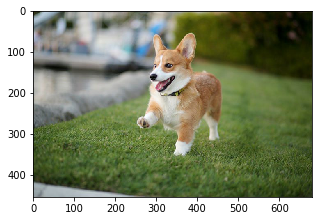

In [ ]:
dog = read_and_show("prance-8.jpg")

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_input_resnet
from tensorflow.keras.applications.resnet50 import decode_predictions as decode_predictions_resnet

resnet = ResNet50(weights="imagenet")

make_prediction(resnet, preprocess_input_resnet, decode_predictions_resnet, dog)

102858752/102853048 [==============================] - 9s 0us/step
Image shape: (1, 224, 224, 3). Max: 151.06100463867188. Min: -123.68000030517578.


[[('n02113023', 'Pembroke', 0.7430695),
  ('n02113186', 'Cardigan', 0.12522723),
  ('n02110806', 'basenji', 0.06935777),
  ('n02091244', 'Ibizan_hound', 0.04006998),
  ('n02085620', 'Chihuahua', 0.0068534003)]]